<a href="https://colab.research.google.com/github/DanRHowarth/Artificial-Intelligence-Cloud-and-Edge-Implementations/blob/master/Oxford_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matplotlib Tutorial 

* This notebook sets out key concepts, sample code and examples for Matplotlib. 
* It covers the following topics:
    * Basic plotting
    * Customising Plots
    * Examples of different charts throughout the notebook 
* The classification and regression tutorials feature further examples of plotting; the aim of this tutorial is to cover the fundamentals of the matplotlib library so that you can understand the code in those tutorials better.
    
    
#### Exercises
 * Each section will have an exercise to help reinforce your learning. We suggest you:
   * Write out each line of code by hand (rather than copy and paste it from the relevant example) - this will improve your understanding of code syntax
   * Write out, above each line of code, an explanation as to what the code, using a comment `#` - this will improve your understanding of how the code works

In [1]:
# import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib 

# Hide all warning messages
import warnings
warnings.filterwarnings('ignore')

## 1. BASIC PLOTS

### 1.1 USING THE PLOTTING FUNCTION TO CREATE SIMPLE CHARTS

In [2]:
# Create some data
x = np.arange(5)          # assume there are 5 students
y = (20, 35, 30, 35, 27)  # their test scores

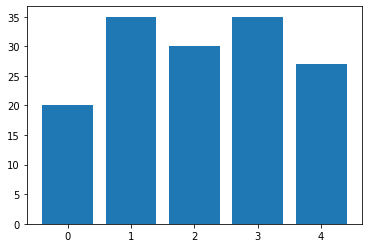

In [3]:
# simple bar plot
plt.bar(x,y)              # Bar plot
plt.show()

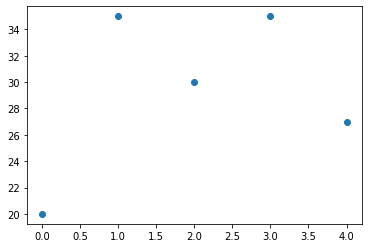

In [4]:
# scatter plot
plt.scatter(x,y)         
plt.show() 

### 1.2 PLOTTING WITH PANDAS

In [5]:
# You can also create the histogram, line graph and the boxplot directly on a dataframe
# df = pd.read_csv('Chapter_2_Code/Data/iris.csv')
from sklearn.datasets import load_wine
data = load_wine()
df = pd.DataFrame(data.data, columns = data.feature_names)
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

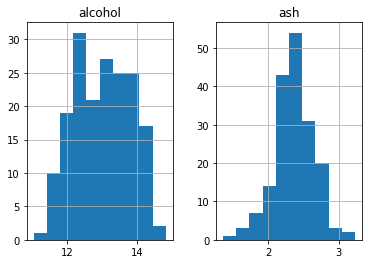

In [6]:
# plot two of the columns as histograms
df[['alcohol','ash']].hist()
plt.show()

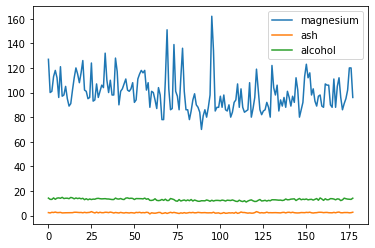

In [7]:
# plotting a line graph - note the key is displayed by default
df[['magnesium','ash','alcohol']].plot()
plt.show()

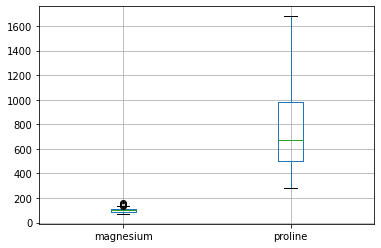

In [8]:
# and box plot
df[['magnesium','proline']].boxplot()
plt.show()

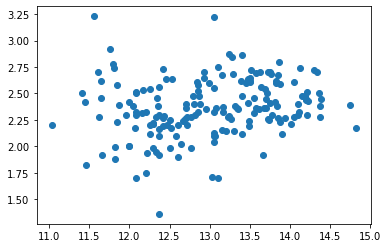

In [9]:
# to plot a scatter graph, we have to take an extra step
X = df['alcohol']
y = df['ash']
plt.scatter(X,y)
plt.show()

#### EXERCISE 1.2: PLOTTING WITH PANDAS
* Call the `df.hist()`, `df.plot() `and `df.boxplot()`without specifying columns to see what is returned
* Select some data points of interest and use the plotting functions to explore them in more detail (by subselecting columns)

## 2. CUSTOMISING PLOTS

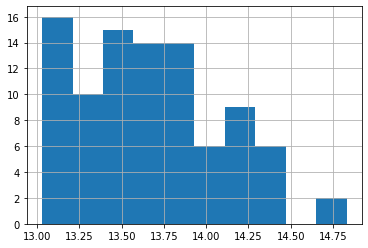

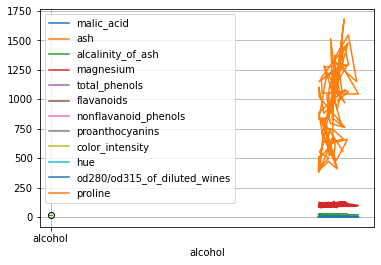

In [24]:
## EXERCISE CODE HERE

df.hist()
df.plot()
df.boxplot()

df.alcohol[df["alcohol"] >= df.alcohol.mean()].hist()
df.alcohol[df["alcohol"] >= df.alcohol.mean()].plot()
df[df["alcohol"] >= df.alcohol.mean()].boxplot("alcohol")





### 2.1 DIFFERENCE BETWEEN PLT AND AX

> `plt.plot()`

is used to add plot elements to the current axes in the current figure. 

pyplot is home to a batch of functions that call on functions defined in the Axes class - note this results in subtly different names for the same functions, e.g. plt.title() and ax.set_title()

> `ax.plot()`

and other functions called from the Axes class rely on the object-oriented approach, which is more customizable and comes in handy as graphs become more complex.
 
>` pd.plot()`

The plot() method on pandas’ Series and DataFrame is a wrapper around plt.plot()

* See this excellent tutorial for more: https://realpython.com/python-matplotlib-guide/#stateful-versus-stateless-approaches

### 2.2 LABELS

In [25]:
# generate sample data
x = np.linspace(0, 20, 1000)  #100 evenly-spaced values from 0 to 50
y = np.sin(x)

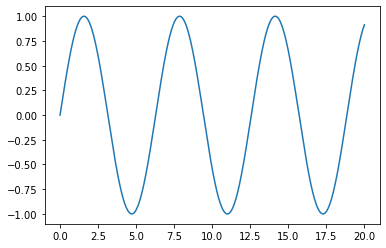

In [26]:
plt.plot(x, y) # simple line plot
plt.show()

#### EXERCISE 2.2: CUSTOMISING PLOTS

* Run the code below
* Uncomment `tight_layout()`to start experimenting with matplotlib parameters.
  * `tight_layout() `can take keyword arguments of pad, w_pad and h_pad.
  * These control the extra padding around the figure border and between subplots.
  * The pads are specified in fraction of fontsize.
* Experiment with parameters 


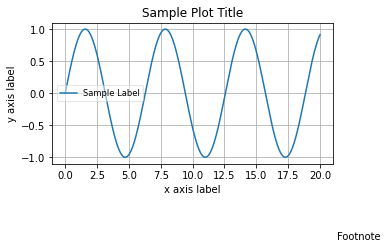

In [36]:
# customize axis labels
plt.plot(x, y, label = 'Sample Label') 
plt.title('Sample Plot Title')                                # chart title 
plt.xlabel('x axis label')                                    # x axis title
plt.ylabel('y axis label')                                    # y axis title
plt.grid(True)                                                # show gridlines 
plt.figtext(0.995, 0.01, 'Footnote', ha='right', va='bottom') # add footnote
plt.legend(loc='best', framealpha=0.5, prop={'size':'small'}) # add legend, location pick the best automatically
plt.tight_layout(pad=5) # pad = 5 smaller than pad = 1
plt.show()

### 2.3 UNDERSTANDING SUBPLOTS
The prescribed way to create a Figure with a single Axes under the OO approach is with plt.subplots():

> `fig, ax = plt.subplots()`

Here we define the figure size (the figure includes within it all the subplots we create), and the subplots (the different plots) we want. See examples below.

We use the ax methods to customise the subplots. ax is a subfigure/plot of the overall figure which allows us to deal with different axes separately. 

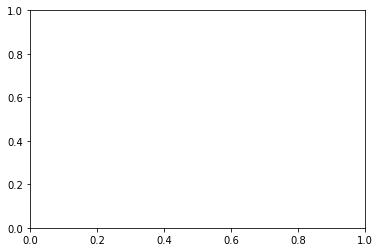

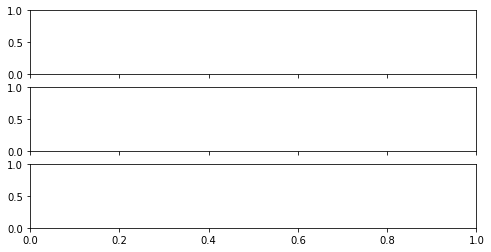

In [37]:
# Generate subplots
fig, ax = plt.subplots() 
fig,(ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(8,4))

In [38]:
# Iterating the Axes within a Figure 
for ax in fig.get_axes():
    pass # do something 

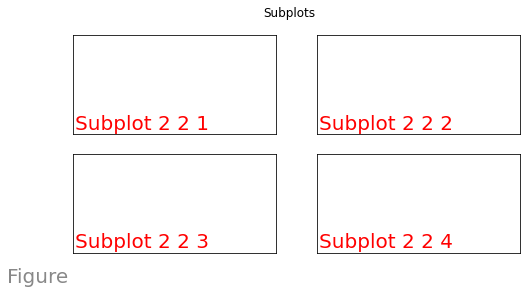

In [39]:
# Simple subplot grid layouts 
fig = plt.figure(figsize=(8,4)) 
fig.text(x=0.01, y=0.01, s='Figure',color='#888888', ha='left', va='bottom', fontsize=20) 
for i in range(4):     
# call fig.add_subplot(nrows, ncols, num)     
    ax = fig.add_subplot(2, 2, i+1)      
    ax.text(x=0.01, y=0.01, s='Subplot 2 2 '+str(i+1),  color='red', ha='left', va='bottom', fontsize=20)    
    ax.set_xticks([]); ax.set_yticks([]) 
ax.set_xticks([]); ax.set_yticks([])
fig.suptitle('Subplots')
#fig.savefig('filename.png', dpi=125) 
plt.show()

*EXAMPLE 1*

In [40]:
# generate sample data
x = np.linspace(0, 20, 1000)
y = np.sin(x)

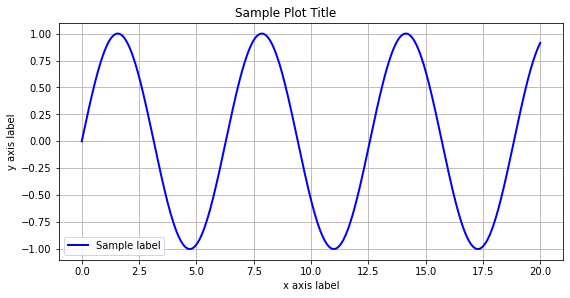

In [41]:
fig = plt.figure(figsize=(8, 4))                        # get an empty figure and add an Axes 
ax = fig.add_subplot(1,1,1)                            # row-col-num 
ax.plot(x, y, 'b-', linewidth=2, label='Sample label') # line plot data on the Axes 

# add title, labels and legend, etc. 
ax.set_ylabel('y axis label', fontsize=10)             # y label
ax.set_xlabel('x axis label', fontsize=10)             # x label    
ax.legend(loc='best')                                  # legend
ax.grid(True)                                          # show grid
fig.suptitle('Sample Plot Title', y=1.02,fontsize=12)                      # title
fig.tight_layout(pad=1)                                # tidy laytout
plt.show()

*EXAMPLE 2*

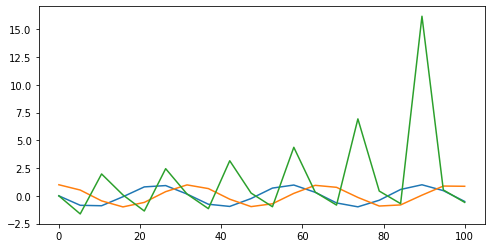

In [42]:
#get the Figure and Axes all at once
fig, ax = plt.subplots(figsize=(8,4))

x1 = np.linspace(0, 100, 20) 
x2 = np.linspace(0, 100, 20)
x3 = np.linspace(0, 100, 20)
y1 = np.sin(x1)
y2 = np.cos(x2)
y3 = np.tan(x3)

ax.plot(x1, y1, label='sin')
ax.plot(x2, y2, label='cos')
ax.plot(x3, y3, label='tan')

##TODO: UNCOMMENT ONE BY ONE AND RUN CODE
## add grid, legend, title 
# ax.grid(True) 
# ax.legend(loc='best', prop={'size':'large'}) 
# fig.suptitle('A Simple Multi Axis Line Plot', fontsize=12)
plt.show()

#### 2.3 EXERCISE: CUSTOMISING SUBPLOTS

* Go through the code below and experiment with the parameters to better understand what they do
* Change a parameter one at a time
* Uncomment the code a line at a time to understand what it is doing
* When you feel comfortable with what the code does, write a comment explaining it to yourself

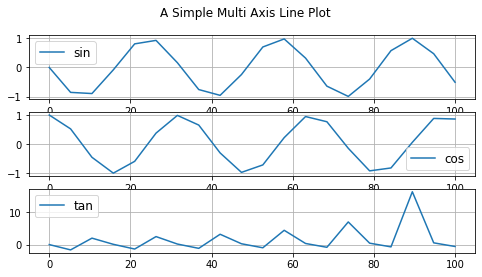

In [55]:
## EXERCISE 2.3

#Changing sharex to True will use the same x axis
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1, sharex=False, sharey = False, figsize=(8,4))

#plot some lines 
x1 = np.linspace(0, 100, 20) #from 0 to 100 by 20
x2 = np.linspace(0, 100, 20) #from 0 to 100 by 20
x3 = np.linspace(0, 100, 20) #from 0 to 100 by 20
y1 = np.sin(x1) # apply the sin function to those values (from 0 to 100 by 20)
y2 = np.cos(x2)
y3 = np.tan(x3)

ax1.plot(x1, y1, label='sin')
ax2.plot(x2, y2, label='cos')
ax3.plot(x3, y3, label='tan')

# add grid, legend, title  
ax1.grid(True) # vertical and horizontal lines
ax2.grid(True)  # vertical and horizontal lines
ax3.grid(True)  # vertical and horizontal lines

ax1.legend(loc='best', prop={'size':'large'}) # Put the label on the line chart
ax2.legend(loc='best', prop={'size':'large'}) # Put the label on the line chart
ax3.legend(loc='best', prop={'size':'large'}) # Put the label on the line chart

fig.suptitle('A Simple Multi Axis Line Plot') # Allows you to add a general title of the charts
plt.show() #Plot

### 2.4 FURTHER EXAMPLES OF CUSTOMISING PLOTS

*EXAMPLE 3*

In [ ]:
# get the Figure and Axes all at once 
fig, ax = plt.subplots(figsize=(8,4)) 

# plot some lines 
N = 3 # the number of lines we will plot 
styles =  ['-', '--', '-.', ':'] 
markers = list('+ox') 
x = np.linspace(0, 100, 20) 
for i in range(N): # add line-by-line     
    y = x + x/5*i + i     
    s = styles[i % len(styles)]     
    m = markers[i % len(markers)]     
    ax.plot(x, y, alpha = 1, label='Line '+str(i+1)+' '+s+m,       
                  marker=m, linewidth=2, linestyle=s) 

    # add grid, legend, title and save 
ax.grid(True) 
ax.legend(loc='best', prop={'size':'large'}) 
fig.suptitle('A Simple Line Plot')
plt.show()

*EXAMPLE 4*

In [ ]:
# get the data
N = 4 
labels = list('ABCD') 
data = np.array(list(range(N))) + np.random.rand(N)

In [ ]:
#plot the data 
fig, ax = plt.subplots(figsize=(8, 3.5)) 
width = 0.5;  
tickLocations = np.arange(N) 
rectLocations = tickLocations-(width/2.0) 

# for color either HEX value of the name of the color can be used
ax.bar(rectLocations, data, width,      
       color='lightblue',     
       edgecolor='#1f10ed', linewidth=4.0) 

# tidy-up the plot 
ax.set_xticks(ticks= tickLocations)
ax.set_xticklabels(labels) 
ax.set_xlim(min(tickLocations)-0.6, max(tickLocations)+0.6) 
ax.set_yticks(list(range(N))[1:]) 
ax.set_ylim((0,N)) 
ax.set_ylabel('y axis label', fontsize=8)             # y label
ax.set_xlabel('x axis label', fontsize=8)             # x label    
ax.yaxis.grid(True)

# title  
fig.suptitle("Bar Plot") 
fig.tight_layout(pad=2) 
plt.show()

*EXAMPLE 5*

In [ ]:
# generate the data
N = 4 
labels = list('ABCD') 
data = np.array(list(range(N))) + np.random.rand(N)

In [ ]:
#plot the data 
fig, ax = plt.subplots(figsize=(8, 3.5)) 
width = 0.5;  
tickLocations = np.arange(N) 
rectLocations = tickLocations-(width/2.0) 

# for color either HEX value of the name of the color can be used
ax.barh(rectLocations, data, width, color='lightblue') 

# tidy-up the plot 
ax.set_yticks(ticks= tickLocations)
ax.set_yticklabels(labels) 
ax.set_ylim(min(tickLocations)-0.6, max(tickLocations)+0.6) 
ax.xaxis.grid(True)
ax.set_ylabel('y axis label', fontsize=8)             # y label
ax.set_xlabel('x axis label', fontsize=8)             # x label 

# title  
fig.suptitle("Bar Plot") 
fig.tight_layout(pad=2) 
plt.show()

*EXAMPLE 6*

In [ ]:
# generate sample data
pre = np.array([19, 6, 11, 9]) 
post = np.array([15, 11, 9, 8]) 
labels=['Survey '+x for x in list('ABCD')] 

In [ ]:
# the plot – left then right 
fig, ax = plt.subplots(figsize=(8, 3.5)) 
width = 0.4 # bar width 
xlocs = np.arange(len(pre)) 
ax.bar(xlocs-width, pre, width,       
       color='green', label='True') 
ax.bar(xlocs, post, width,       
       color='#1f10ed', label='False')

# labels, grids and title
ax.set_xticks(ticks=list(range(len(pre)))) 
ax.set_xticklabels(labels) 
ax.yaxis.grid(True) 
ax.legend(loc='best') 
ax.set_ylabel('Count') 
fig.suptitle('Sample Chart', y=1.05) 
fig.tight_layout(pad=1) 
plt.show()

*EXAMPLE 7*

In [ ]:
# generate sample data 
data = np.array([15,8,4]) 
labels = ['Feature Engineering', 'Model Tuning', 'Model Building']
explode = (0, 0.1, 0) # explode feature engineering  
colrs=['cyan', 'tan', 'wheat']

In [ ]:
# plot 
fig, ax = plt.subplots(figsize=(8, 3.5)) 
ax.pie(data, explode=explode,     
       labels=labels, autopct='%1.1f%%',     
       startangle=270, colors=colrs) 
ax.axis('equal') # keep it a circle

# add a title 
fig.suptitle("ML Pie") 
plt.show()

### Next Steps
* If you wish to learn more, work through this excellent book [chapter](https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html) 